9-5 글로브(GloVe)\
LSA와 Word2Vec의 단점을 보완하는 목적으로 나온것으로 카운트 기반과 예측 기반을 모두 사용하는 방법이다.

1. 기존 방법론에 대한 비판

LSA는 DTM, TF-IDF 등 각 문서에서 단어의 빈도수를 카운트한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소하여 잠재된 의미를 끌어내는 방법\
Word2Vec은 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법\
\
LSA는 카운트 기반으로 전체적인 통계 정보를 고려하지만, 단어 의미의 유추 작업에는 성능이 떨어진다.\
Word2Vec은 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못한다.\
GloVe는 LSA의 카운트 기반 방법과 Word2Vec의 예측 기반 방법론 두 가지 모두를 사용한다.

2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

ex)
- I like deep learning
- I like NLP
- I enjoy flying

윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고하게 된다. 윈도우 크기가 1일 때, 위의 텍스트를 가지고 구성한 동시 등장 행렬 예시는 밑의 그림과 같다.\
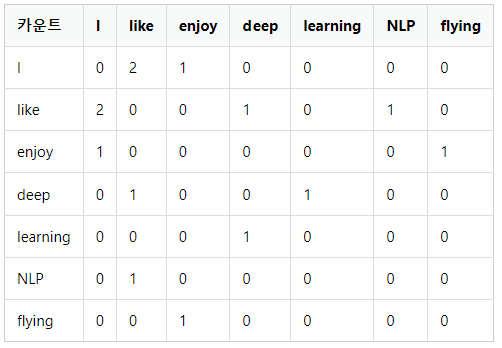\
위 행렬은 행렬을 전치해도 동일한 행렬이 된다(Symmetric)

3. 동시 등장 확률(Co-occurrence Probability)

동시 등장 확률 P(k|i)은 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률\
P(k|i)에서 i를 중심 단어, k를 주변 단어라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고,\
i행 k열의 값을 분자로 한 값이라고 볼 수 있다. 아래 그림은 GloVe의 제안 논문에서 가져온 동시 등장 확률을 표로 정리한 하나의 예이다.\
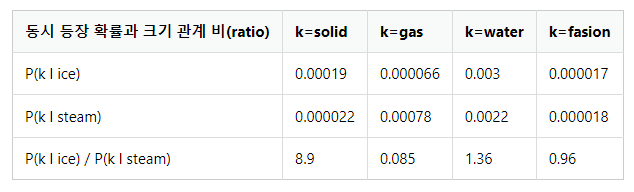\
표를 보고 알수있는 사실은 ice가 등장했을 때 solid가 등장할 확률 0.00019은 steam이 등장했을 때 solid가 등장할 확률인 0.000022보다 약 8.9배 크다\
수식적으로 언급하면 k가 solid일 때, P(solid l ice) / P(solid l steam)를 계산한 값은 8.9가 나온다. 이 값은 1보다는 매우 큰 값이다. 왜냐면 분자의 값은 크고, 분모의 값은 작기 때문이다.

만약 k를 gas로 바꾸게 된다면, gas는 ice보다는 steam에 더 자주 등장하므로 P(gas l ice) / P(gas l steam)를 계산한 값은 1보다 훨씬 작은 값인 0.085가 나온다.\
k가 water인 경우에는 ice와 steam 두 단어 모두와 동시 등장하는 경우가 많으므로 1보다 조금 크지만 1에 가까운 값이 나오고,\
k가 fasion인 경우에는 ice와 steam 두 단어 모두와 동시 등장하는 경우가 적으므로 1보다 조금 작지만 1에 가까운값이 나오게 된다

4. 손실 함수\
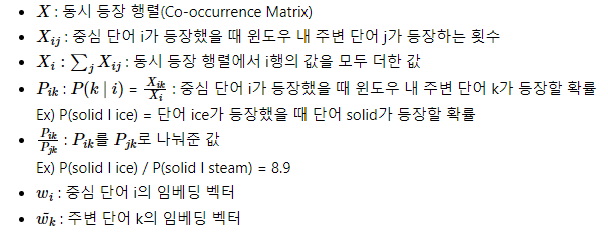

GloVe의 아이디어를 한 줄로 요약하면 '임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'이다. 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표이다.\
dot product(w_{i} {w_{k}}) ~ P(k|i) = P_{ik} , 정확히는 dot product(w_{i} {w_{k}}) ~ log P(k|i) = log P_{ik}\
임베딩 벡터를 만들기 위한 손실 함수를 처음부터 설계할때 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다.\
이를 위해 앞에서 배운 개념인 P_{ik} / P_{jk}를 식에 사용한다.초기 전제로는 아래와 같다.\
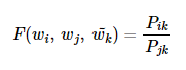\
여러 과정을 거쳐서(본문 참조) 최종적으로 다음과 같은 일반화 된 손실 함수를 얻어낼 수 있다.\
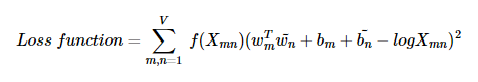

5. GloVe 훈련시키기

In [2]:
pip install glove_python_binary

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glove_python_binary (from versions: none)
ERROR: No matching distribution found for glove_python_binary

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\rladu\anaconda3\envs\my_env\python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (2350214200.py, line 1)